In [ ]:
# Radiomics Feature Visualization

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

# === 1. Import Dependencies ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import textwrap
import os

# Enable inline plotting in Jupyter
%matplotlib inline
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.dpi'] = 150


In [2]:
# === 2. Load CSV File ===
df = pd.read_csv("table/Processed_data.csv")  # Replace with your CSV file path

# === 3. Extract feature and label columns ===
features = df.columns[1:-1]  # All columns except the first (ct_id) and last (label)
label_column = df.columns[-1]  # The last column is the label

print("Original feature columns:")
print(features)

# Sort features according to a custom desired order
desired_order = [
    'original_glcm_MaximumProbability',
    'log-sigma-5-0-mm-3D_firstorder_10Percentile',
    'wavelet-LHH_glcm_Correlation',
    'log-sigma-2-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis',
    'log-sigma-4-0-mm-3D_glcm_Idmn',
    'wavelet-LHH_gldm_SmallDependenceHighGrayLevelEmphasis',
    'wavelet-HLL_glcm_Correlation',
    'wavelet-HHL_gldm_SmallDependenceHighGrayLevelEmphasis',
    'wavelet-HLL_glcm_Correlation',
    'log-sigma-4-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis'
]
features = [feat for feat in desired_order if feat in features]

# === 4. Map numeric labels to descriptive class names ===
df[label_column] = df[label_column].map({0: "CMS4-TME+", 1: "CMS4-TME-"})


Original feature columns:
Index(['original_glcm_MaximumProbability',
       'log-sigma-2-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis',
       'log-sigma-4-0-mm-3D_glcm_Idmn',
       'log-sigma-4-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis',
       'log-sigma-5-0-mm-3D_firstorder_10Percentile', 'wavelet-LLH_glcm_MCC',
       'wavelet-LHH_glcm_Correlation',
       'wavelet-LHH_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-HLL_glcm_Correlation',
       'wavelet-HHL_gldm_SmallDependenceHighGrayLevelEmphasis'],
      dtype='object')


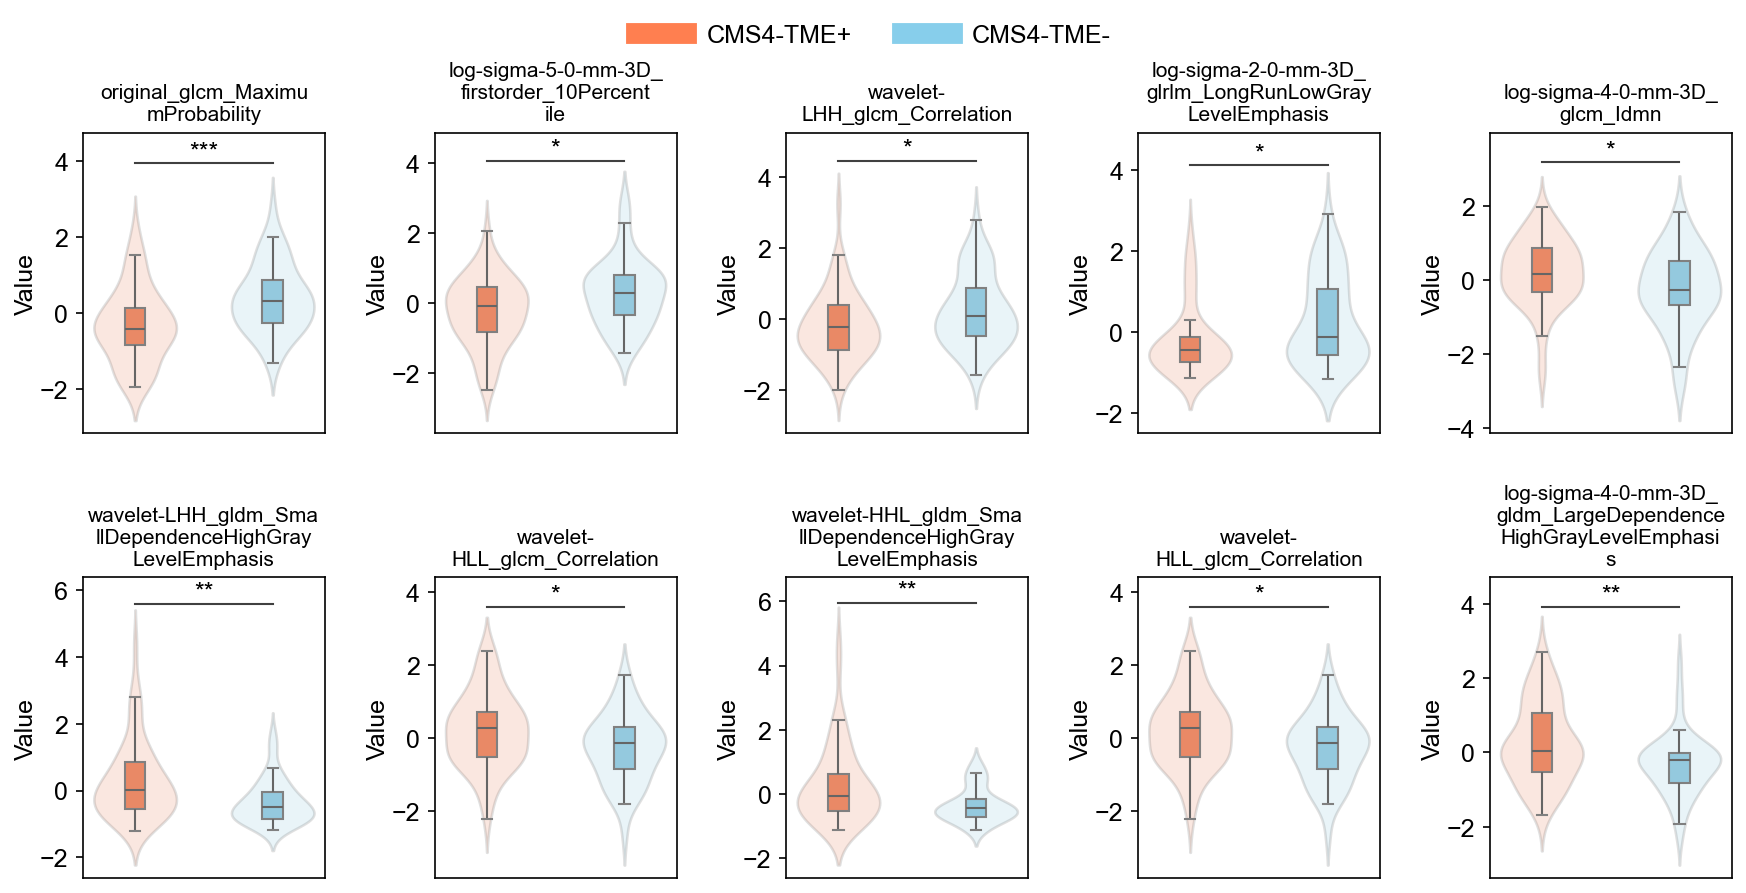

Radiomics plots generated and saved successfully!


In [3]:
# === 5. Create the figure canvas ===
fig = plt.figure(figsize=(12, 6))
os.makedirs("img_plot", exist_ok=True)

# === 6. Loop to plot each feature ===
for i, feature in enumerate(features):
    plt.subplot(2, 5, i + 1)  # 2 rows × 5 columns grid
    ax = sns.violinplot(
        x=label_column,
        y=feature,
        data=df,
        palette={"CMS4-TME+": "coral", "CMS4-TME-": "skyblue"},
        inner=None,            # Hide internal lines/points
        hue=None,              # Ensure no hue is used
        legend=False,
        width=0.6,
    )
    # Adjust transparency for violin bodies
    for violin_part in ax.collections:
        violin_part.set_alpha(0.2)

    # Overlay boxplot
    sns.boxplot(
        x=label_column,
        y=feature,
        data=df,
        palette={"CMS4-TME+": "coral", "CMS4-TME-": "skyblue"},
        width=0.15,
        boxprops=dict(linewidth=1, edgecolor="gray"),
        capprops=dict(color="gray", linewidth=1),
        showfliers=False,  # Hide outliers to avoid duplication
    )

    # === 7. Perform Mann–Whitney U test ===
    group1 = df[df[label_column] == "CMS4-TME+"][feature]
    group2 = df[df[label_column] == "CMS4-TME-"][feature]
    stat, p = mannwhitneyu(group1, group2)

    # Determine significance level
    if p < 0.001:
        significance = "***"
    elif p < 0.01:
        significance = "**"
    elif p < 0.05:
        significance = "*"
    else:
        significance = "ns"

    # Add significance line and asterisks
    x1, x2 = 0, 1  # Positions for two groups
    y, h, col = df[feature].max() + 1.2, 0, "black"
    plt.plot([x1, x2], [y, y], lw=1, c="#404040")  # Horizontal line
    plt.text((x1 + x2) * 0.5, y + h, significance,
             ha="center", va="bottom", color=col, fontsize=12)

    # Wrap feature name as the title
    plt.ylim(None, df[feature].max() + 2)
    wrapped_title = "\n".join(textwrap.wrap(feature, width=20))
    plt.title(wrapped_title, fontsize=10)

    # Axis and tick settings
    plt.xlabel("")     # Hide x-axis label
    plt.xticks([])     # Hide x-tick labels
    plt.ylabel("Value", fontsize=12, labelpad=0.8)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# === 8. Add legend ===
legend_labels = ["CMS4-TME+", "CMS4-TME-"]
legend_colors = ["coral", "skyblue"]
handles = [plt.Line2D([0], [0], color=color, lw=10) for color in legend_colors]
fig.legend(
    handles,
    legend_labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.02),
    fontsize=12,
    ncol=2,
    frameon=False,  # Remove legend border
)

# === 9. Adjust layout and save ===
fig.tight_layout(pad=2.0, w_pad=2, h_pad=2.0)
fig.savefig("img_plot/Radiomics.svg", format="svg", bbox_inches="tight")
fig.savefig("img_plot/Radiomics.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

print("Radiomics plots generated and saved successfully!")